In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("US_Superstore_data.xls")

In [1]:
states_count = df.groupby("State")["Sales"].sum()
top_sales = states_count.sort_values(ascending=False).head(10)

top_sales_df = top_sales.reset_index()
top_sales_df.columns = ['State', 'Sales']

plt.figure(figsize=(12, 6))
sns.barplot(x="State", y="Sales", data=top_sales_df , palette="Blues")
plt.title("Top 10 States by Sales")
plt.show()

NameError: name 'df' is not defined

        State        Sales      Profit
0  California  457687.6315  76381.3871
1    New York  310876.2710  74038.5486


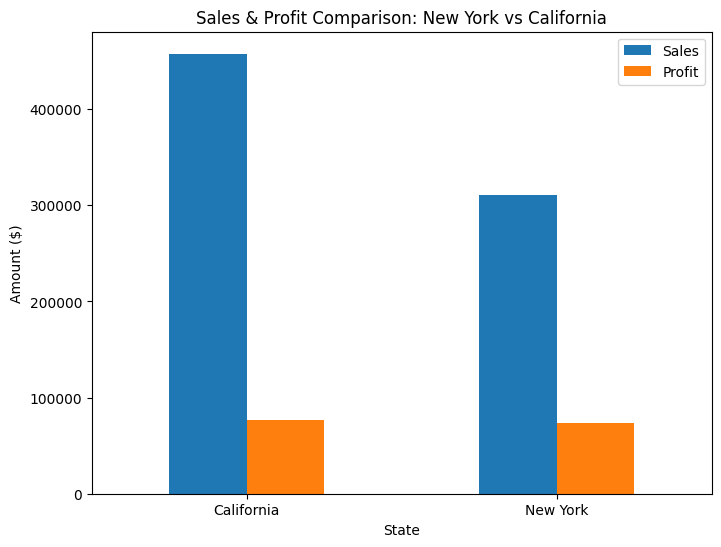

In [35]:
subset = df[df['State'].isin(['New York', 'California'])]

# Group by state and sum Sales & Profit
comparison = subset.groupby('State')[['Sales', 'Profit']].sum().reset_index()

print(comparison)

# Bar chart
comparison.plot(x='State', y=['Sales', 'Profit'], kind='bar', figsize=(8,6))
plt.title("Sales & Profit Comparison: New York vs California")
plt.ylabel("Amount ($)")
plt.xticks(rotation=0)
plt.show()

Most Outstanding Customer in New York by Sales:
                   Sales     Profit
Customer Name                      
Tom Ashbrook   13723.498  4599.2073


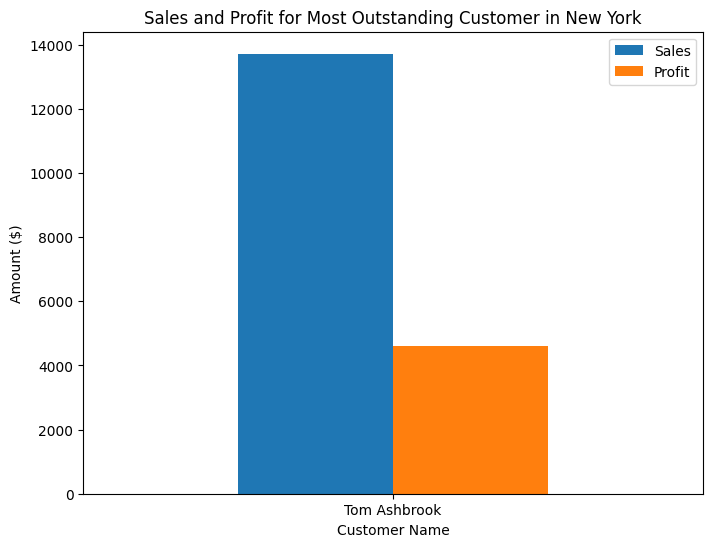

In [66]:
ny_customers = df[df['State'] == 'New York']

customer_summary = ny_customers.groupby("Customer Name")[["Sales", "Profit"]].sum()
top_customer = customer_summary.sort_values(by="Sales", ascending=False).head(1)

print("Most Outstanding Customer in New York by Sales:")
print(top_customer)

# Plotting the top customer's sales and profit
top_customer.plot(y=['Sales', 'Profit'], kind='bar', figsize=(8,6))
plt.title("Sales and Profit for Most Outstanding Customer in New York")
plt.ylabel("Amount ($)")
plt.xlabel("Customer Name")
plt.xticks(rotation=0)
plt.show()

/tmp/ipython-input-1098824966.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_profit.values, y=state_profit.index, palette="viridis")


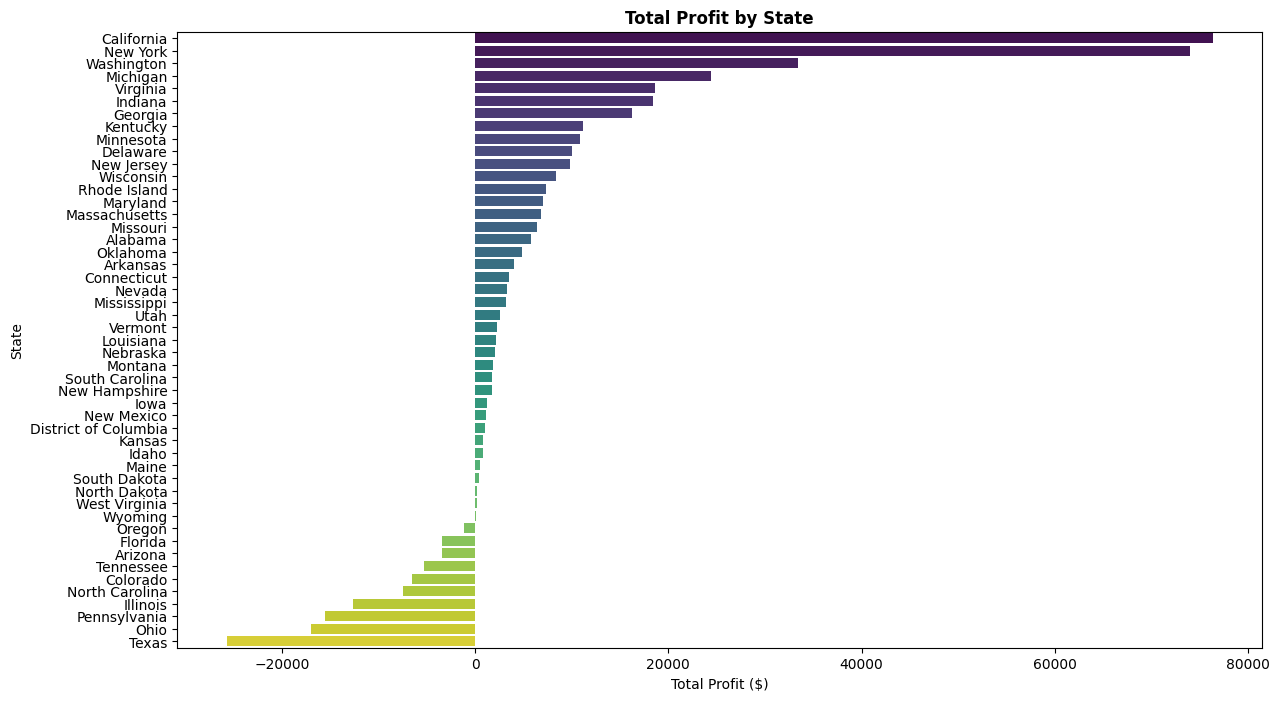

In [58]:
state_profit = df.groupby("State")["Profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(14,8))
sns.barplot(x=state_profit.values, y=state_profit.index, palette="viridis")
plt.title("Total Profit by State", fontweight="bold")
plt.xlabel("Total Profit ($)")
plt.ylabel("State")
plt.show()

Top 20% customers profit contribution: 81.43 %


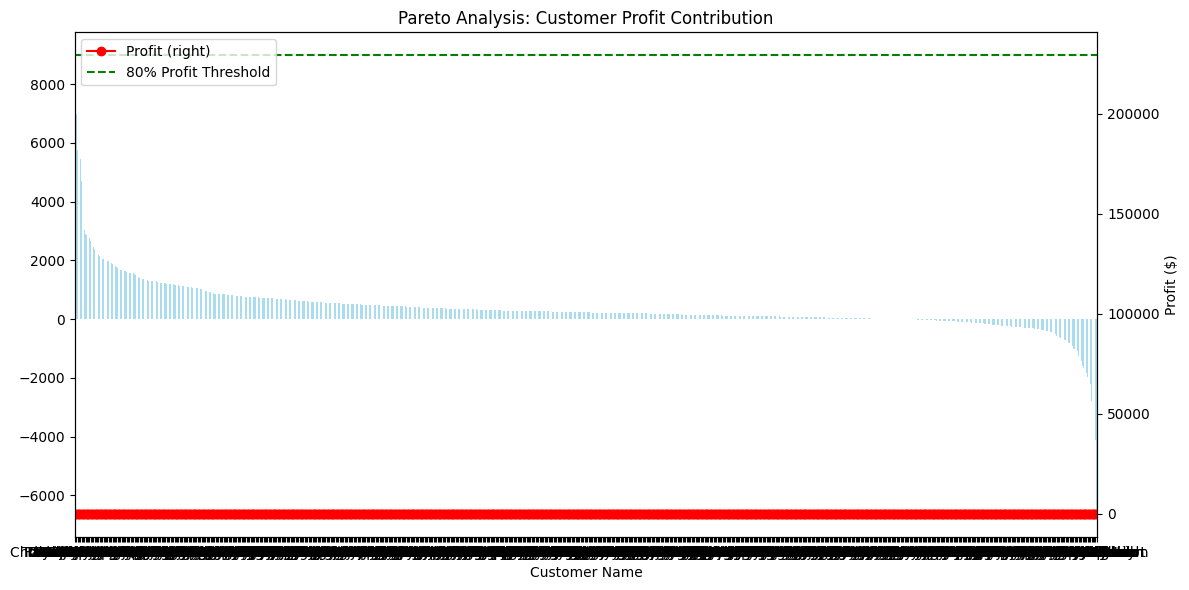

In [59]:
customer_profit = df.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False)

# Total profit
total_profit = customer_profit.sum()

# Cumulative contribution (in %)
cumulative_profit = customer_profit.cumsum() / total_profit * 100

# Number of customers
n_customers = len(customer_profit)

# Top 20% count
top_20_percent_count = int(0.2 * n_customers)

# Profit from top 20% customers
top_20_profit = customer_profit.head(top_20_percent_count).sum()

print("Top 20% customers profit contribution:", round(top_20_profit / total_profit * 100, 2), "%")


plt.figure(figsize=(12,6))

# Bar plot for profit by customer
customer_profit.plot(kind="bar", color="skyblue", alpha=0.7)

# Add cumulative profit line
cumulative_profit.plot(secondary_y=True, color="red", marker="o")

plt.title("Pareto Analysis: Customer Profit Contribution")
plt.ylabel("Profit ($)")
plt.xlabel("Customer")
plt.axhline(y=0.8*total_profit, color="green", linestyle="--", label="80% Profit Threshold")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


              City      Sales     Profit
0          Anaheim  7986.8700  1234.0036
1          Antioch    19.4400     9.3312
2     Apple Valley  1915.0810   283.6184
3           Auburn  1384.1580   280.8048
4      Bakersfield  1377.2900   187.9247
5        Brentwood  5090.1140  1216.8104
6          Buffalo  9063.4960   992.8791
7          Burbank  3247.1580   764.5338
8        Camarillo  1467.5175   158.7956
9            Chico  2050.1780   205.1254
10     Chula Vista  1041.6200   248.4346
11  Citrus Heights   129.3900    54.3438
12       Coachella   163.5500    47.1736
13         Concord  2602.9280   282.4208
14      Costa Mesa  1497.6700   297.2089
15        Danville  1158.8820   282.4405
16           Davis    32.4000    15.5520
17          Dublin    22.0000     1.3750
18        El Cajon   865.6160    52.6872
19       Encinitas   591.9810    71.0588


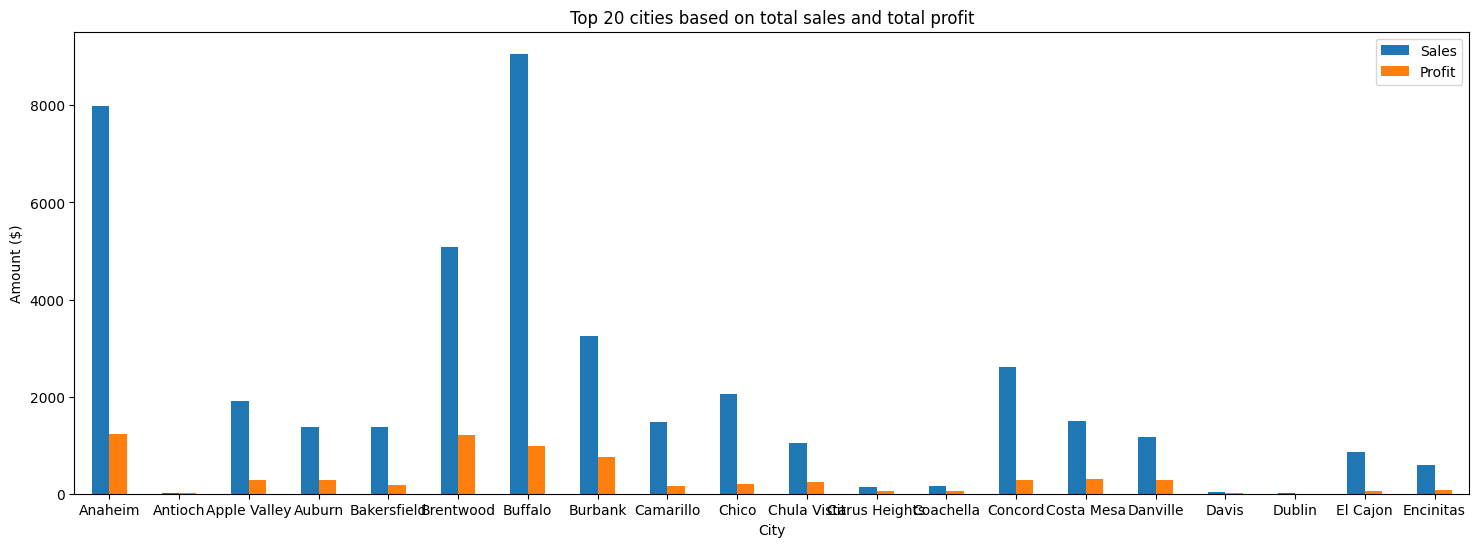

In [65]:
# Group by city and sum Sales & Profit
comparison = subset.groupby('City')[['Sales', 'Profit']].sum().head(20).reset_index()

print(comparison)

# Bar chart
comparison.plot(x='City', y=['Sales', 'Profit'], kind='bar', figsize=(18,6))
plt.title("Top 20 cities based on total sales and total profit")
plt.ylabel("Amount ($)")
plt.xticks(rotation=0)
plt.show()


Most Outstanding Customer in New York by Sales:
                      Sales     Profit
Customer Name                         
Tom Ashbrook      13723.498  4599.2073
Peter Fuller       7678.228   543.2819
Seth Vernon        7359.918  1571.7964
Tom Boeckenhauer   6999.960  2239.9872
Greg Tran          6712.744   774.7935
Todd Sumrall       6492.314  1574.9714
Karen Daniels      6241.282  2283.0463
Keith Dawkins      5854.194  2510.8903
Luke Weiss         5048.186   773.1004
Caroline Jumper    5012.760  1300.0330
Nathan Mautz       4821.292  2247.1904
Pete Kriz          4816.690  1695.3209
John Murray        4548.810  1228.1787
Adam Bellavance    4438.686  1453.4346
Darrin Martin      4283.792  1599.6806
Corinna Mitchell   3999.790  1366.8625
Steven Roelle      3904.680  1863.9614
Mitch Webber       3685.610  1017.6452
Rick Hansen        3491.712   515.5829
Christine Phan     3468.258 -1027.4035


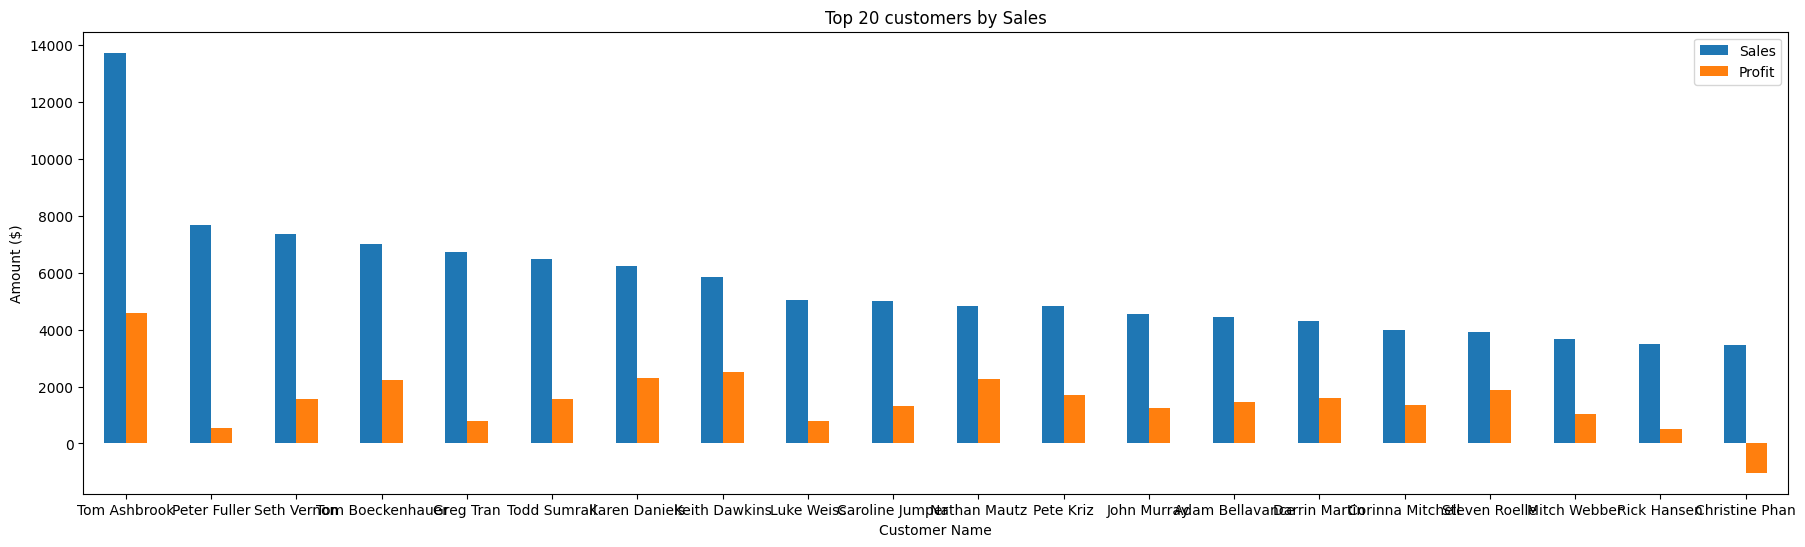

In [70]:
top_customer = customer_summary.sort_values(by="Sales", ascending=False).head(20)

print("Most Outstanding Customer in New York by Sales:")
print(top_customer)

# Plotting the top customer's sales and profit
top_customer.plot(y=['Sales', 'Profit'], kind='bar', figsize=(22,6))
plt.title("Top 20 customers by Sales")
plt.ylabel("Amount ($)")
plt.xlabel("Customer Name")
plt.xticks(rotation=0)
plt.show()

## Calculate total sales per customer

### Subtask:
Calculate the sum of sales for each customer.


**Reasoning**:
I need to group the DataFrame by 'Customer Name' and calculate the sum of 'Sales' for each customer to identify top customers by sales.



In [71]:
customer_sales = df.groupby("Customer Name")["Sales"].sum()

## Sort customers by sales

### Subtask:
Sort the customers in descending order based on their total sales.


**Reasoning**:
Sort the `customer_sales` Series in descending order and store it in a new variable.



In [72]:
customer_sales_sorted = customer_sales.sort_values(ascending=False)

## Calculate cumulative sales

### Subtask:
Calculate the cumulative sum of sales and the cumulative percentage of total sales.


**Reasoning**:
Calculate the cumulative sum of sorted customer sales and the cumulative percentage of total sales.



In [73]:
cumulative_sales = customer_sales_sorted.cumsum()
total_sales = customer_sales.sum()
cumulative_sales_percentage = (cumulative_sales / total_sales) * 100

## Identify top customers for pareto

### Subtask:
Determine the number of top customers that contribute to a significant percentage of total sales (e.g., 80%).


**Reasoning**:
Determine the index where the cumulative sales percentage first exceeds 80%, get the customer names up to this index, and print the results.



In [74]:
pareto_threshold = 80

# Find the index where cumulative sales percentage first exceeds the threshold
pareto_index = cumulative_sales_percentage[cumulative_sales_percentage >= pareto_threshold].index[0]

# Get the customer names up to this index
top_customers_pareto = customer_sales_sorted.loc[:pareto_index]

# Print the number of top customers and their names
print(f"Number of top customers contributing to {pareto_threshold}% of sales: {len(top_customers_pareto)}")
print("Top customer names:")
display(top_customers_pareto.index.tolist())

Number of top customers contributing to 80% of sales: 396
Top customer names:


['Sean Miller',
 'Tamara Chand',
 'Raymond Buch',
 'Tom Ashbrook',
 'Adrian Barton',
 'Ken Lonsdale',
 'Sanjit Chand',
 'Hunter Lopez',
 'Sanjit Engle',
 'Christopher Conant',
 'Todd Sumrall',
 'Greg Tran',
 'Becky Martin',
 'Seth Vernon',
 'Caroline Jumper',
 'Clay Ludtke',
 'Maria Etezadi',
 'Karen Ferguson',
 'Bill Shonely',
 'Edward Hooks',
 'John Lee',
 'Grant Thornton',
 'Helen Wasserman',
 'Tom Boeckenhauer',
 'Peter Fuller',
 'Christopher Martinez',
 'Justin Deggeller',
 'Joe Elijah',
 'Laura Armstrong',
 'Pete Kriz',
 'Daniel Raglin',
 'Natalie Fritzler',
 'Karen Daniels',
 'Nick Crebassa',
 'Harry Marie',
 'Keith Dawkins',
 'Sean Braxton',
 'Zuschuss Carroll',
 'Joseph Holt',
 'Nora Preis',
 'Anna Häberlin',
 'Adam Bellavance',
 'Jim Epp',
 'Jane Waco',
 'Lena Creighton',
 'John Murray',
 'Jonathan Doherty',
 "Patrick O'Brill",
 'Maribeth Schnelling',
 'Rick Wilson',
 'Brian Moss',
 'Paul Prost',
 'Natalie Webber',
 'Dean percer',
 'Fred Hopkins',
 'Rick Huthwaite',
 'Penelop

## Visualize pareto analysis

### Subtask:
Create a plot with customer sales on one axis and the cumulative percentage of sales on the secondary axis.


**Reasoning**:
Create a plot with customer sales on the primary y-axis and cumulative sales percentage on the secondary y-axis to visualize the Pareto principle.



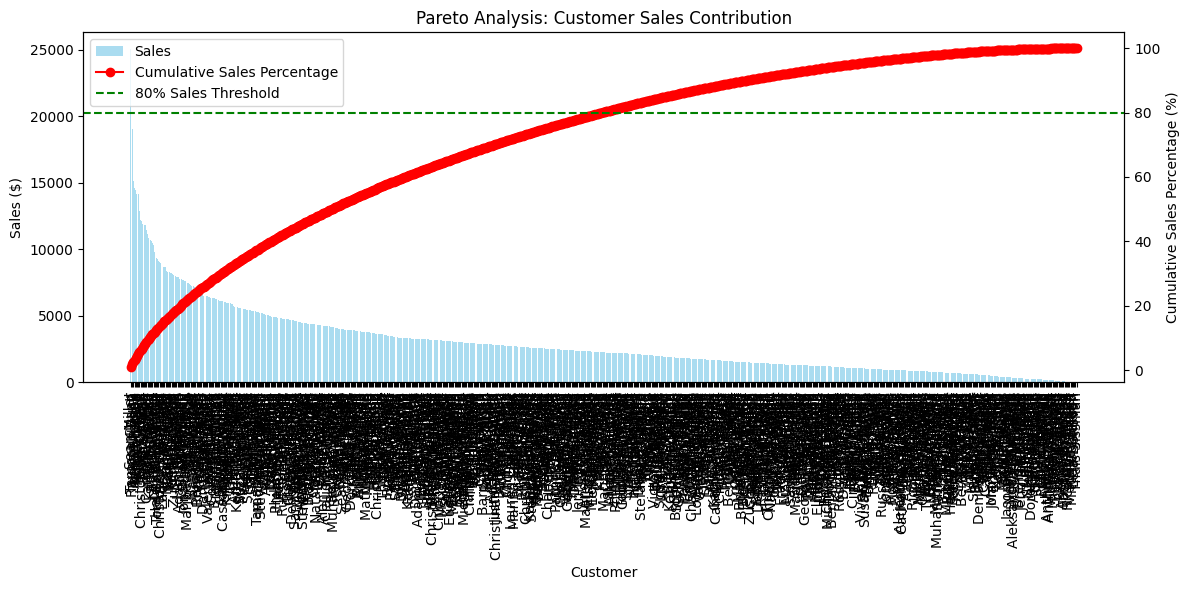

In [75]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot customer sales as a bar chart on the primary y-axis
ax1.bar(customer_sales_sorted.index, customer_sales_sorted.values, color="skyblue", alpha=0.7, label="Sales")
ax1.set_ylabel("Sales ($)")
ax1.set_xlabel("Customer")
ax1.tick_params(axis="x", rotation=90)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot cumulative sales percentage as a line plot on the secondary y-axis
ax2.plot(cumulative_sales_percentage.index, cumulative_sales_percentage.values, color="red", marker="o", label="Cumulative Sales Percentage")
ax2.set_ylabel("Cumulative Sales Percentage (%)")

# Set the title of the plot
plt.title("Pareto Analysis: Customer Sales Contribution")

# Add a horizontal dashed line at 80% on the secondary y-axis
ax2.axhline(y=80, color="green", linestyle="--", label="80% Sales Threshold")

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The analysis identified 396 top customers who collectively contribute to 80% of the total sales, aligning with the Pareto principle.
*   A visualization was successfully created showing individual customer sales and the cumulative percentage of total sales, highlighting the distribution of sales among customers.

### Insights or Next Steps

*   Focus marketing and customer retention efforts on the identified top 396 customers to maximize revenue.
*   Investigate the characteristics and behaviors of the top customers to identify potential strategies for acquiring similar high-value customers.


Based on the analysis, marketing strategies should prioritize the state of california as it has the highest total profit and the cities Anaheim and Brentwood as the have the highest profit margin.